Danish Deepak

## Major project 2 - Data Analysis IPL


This project consists of analysing the data of IPL matches from 2008 to 2020. IPL is a cricket tournament that is played in the country of India from the month of april to june every year. IPL is one of the most famous cricket tournament in the world. The following project consists of two datasets, 1) Every match data and 2) Every ball delivered data. Using these datasets I shall analyseand answer some of the frequently asked questions when IPL comes to mind.    

In [1]:
# Importing all the important libraries which will be required to do this project.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [153]:
# Importing both datasets.

df_m = pd.read_csv('IPL Matches 2008-2020.csv')
df_b = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')

Exploring the matches dataframe.

In [3]:
# looking at the dataframe itself
df_m.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [4]:
# Looking at the data type of each column.
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

Exploring the Ball by Ball dataframe

In [5]:
# looking at the dataframe itself.
df_b.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [6]:
# Looking at the data type of each column
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

### 1. What is the count of matches played in each season?

In [7]:
# finding out the number of seasons in the dataframe

seasons = {}

for i in df_m['date']:
    if i.split('-')[0] not in seasons:
        seasons[i.split('-')[0]] = 0

print(seasons)

{'2008': 0, '2009': 0, '2010': 0, '2011': 0, '2012': 0, '2013': 0, '2014': 0, '2015': 0, '2016': 0, '2017': 0, '2018': 0, '2019': 0, '2020': 0}


In [8]:
# finding out the number of matches played in each season 

for i in seasons.keys():
    for j in df_m['date']:
        if i in j:
            seasons[i]+=1

In [254]:
seasons

{'2008': 58,
 '2009': 57,
 '2010': 60,
 '2011': 73,
 '2012': 74,
 '2013': 76,
 '2014': 60,
 '2015': 59,
 '2016': 60,
 '2017': 59,
 '2018': 60,
 '2019': 60,
 '2020': 60}

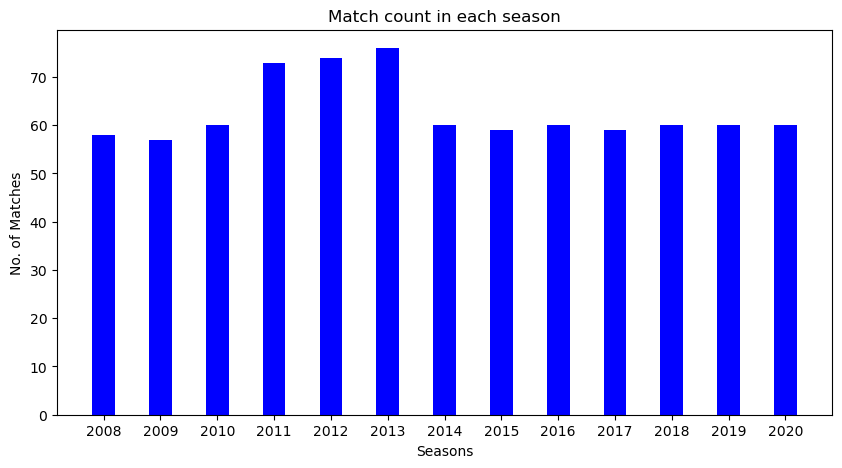

In [10]:
# Visualization of the count of matches in each seasons

x = list(seasons.keys())
y = list(seasons.values())

fig = plt.figure (figsize = (10,5))

plt.bar(x,y, color = 'blue', width=0.4)

plt.xlabel('Seasons')
plt.ylabel('No. of Matches')
plt.title('Match count in each season')
plt.show()

### 2. How many runs were scored in each season?

In [12]:
# Making a dictionary for all the matches in the dataframe

matches = {}

for i in df_b['id']:
    if i not in matches:
        matches[i]=0

In [13]:
# runs for every match

for i in matches:
    runs = 0
    for j in df_b.values:
        if i == j[0]:
            runs += j[9] 
    matches[i]=runs

In [15]:
#Creating a dictionary for total runs in every seasons

season_total_runs = {}

for i in seasons.keys():
    season_total_runs[i] = 0

print(season_total_runs)

{'2008': 0, '2009': 0, '2010': 0, '2011': 0, '2012': 0, '2013': 0, '2014': 0, '2015': 0, '2016': 0, '2017': 0, '2018': 0, '2019': 0, '2020': 0}


In [16]:
# finding total runs in every seasons

for i in seasons.keys():
    runs = 0
    for j in df_m.values:
        if i in j[2]:
            if j[0] in matches.keys():
                runs += matches[j[0]]
    
    season_total_runs[i] = runs

season_total_runs

{'2008': 17937,
 '2009': 16320,
 '2010': 18864,
 '2011': 21154,
 '2012': 22453,
 '2013': 22541,
 '2014': 18909,
 '2015': 18332,
 '2016': 18862,
 '2017': 18769,
 '2018': 19901,
 '2019': 19400,
 '2020': 19352}

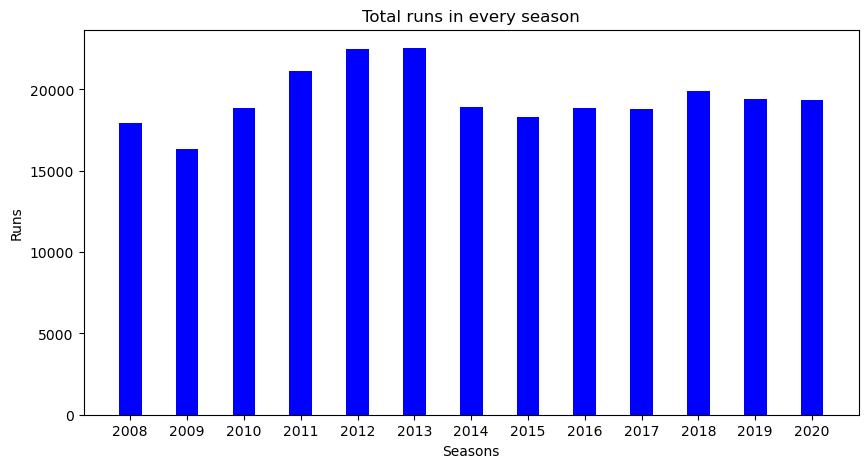

In [17]:
# Visualizations of the total runs in every season

x = season_total_runs.keys()
y = season_total_runs.values()

fig = plt.figure(figsize = (10,5))

plt.bar(x,y, color = 'blue', width =0.4)

plt.xlabel('Seasons')
plt.ylabel('Runs')
plt.title('Total runs in every season')

plt.show()

### 3. What was the run scored per match in every season?

In [18]:
# To find the runs scored per match in every season we need to find the ratio of total runs scored in every season to the 
# total number of matches in every season.

In [19]:
# Creating a dictionary to find the runs scored per match in every season

runs_per_match = {}
for i in seasons.keys():
    runs_per_match[i] = round(float(season_total_runs[i]/seasons[i]),2)

runs_per_match

{'2008': 309.26,
 '2009': 286.32,
 '2010': 314.4,
 '2011': 289.78,
 '2012': 303.42,
 '2013': 296.59,
 '2014': 315.15,
 '2015': 310.71,
 '2016': 314.37,
 '2017': 318.12,
 '2018': 331.68,
 '2019': 323.33,
 '2020': 322.53}

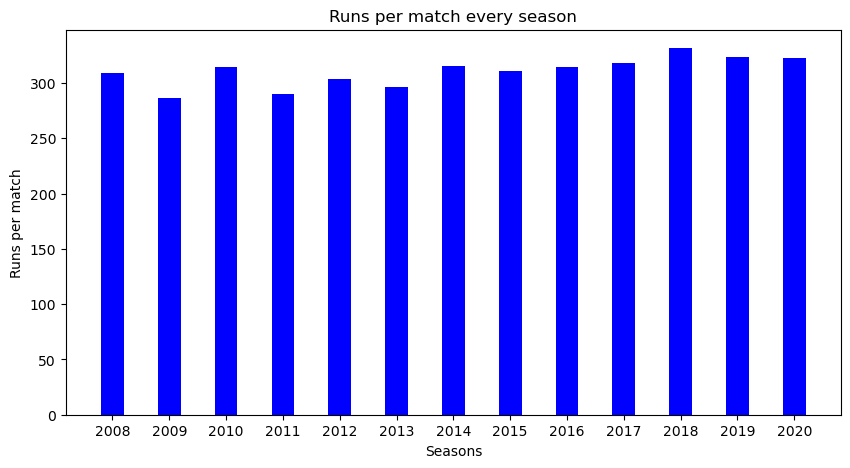

In [20]:
# Visualizing the runs scored per match in every season.

x = runs_per_match.keys()
y = runs_per_match.values()

fig = plt.figure(figsize = (10,5))

plt.bar(x,y, color = 'blue', width =0.4)

plt.xlabel('Seasons')
plt.ylabel('Runs per match')
plt.title('Runs per match every season')

plt.show()

### 4. Who has umpired the most ?

In [38]:
#Finding all the umpires in the dataframe.

umpire = {}

for j in (-1,-2):
    for i in df_m.values:
        if i[j] not in umpire:
            umpire[i[j]]=0

In [41]:
#Finding the number of matches umpired by each empire.

for i in umpire.keys():
    c = 0
    for k in (-1,-2):
        for j in df_m.values:
            if i == j[k]:
                c += 1
    umpire[i] = c

In [113]:
# Finding the umpire who has umpired the most

lst_u = umpire.items()
df_umpire = pd.DataFrame(lst_u, columns = ['Umpire', 'No. of Matches'])
df_umpire.sort_values(by = 'No. of Matches', ascending = False)

,Umpire,No. of Matches
19,S Ravi,121
20,HDPK Dharmasena,94
31,AK Chaudhary,87
30,C Shamshuddin,82
16,M Erasmus,65
43,Nitin Menon,57
34,CK Nandan,57
15,SJA Taufel,55
47,Asad Rauf,51
25,VA Kulkarni,50


### 5. Which team has won the most tosses ?

In [107]:
# Finding all the teams in the Data frame

toss_winner = {}

for i in df_m.values:
    if i[8] not in toss_winner:
        toss_winner[i[8]] = 0

In [111]:
# Finding the number of tosses won by each team

for i in toss_winner.keys():
    c = 0
    for j in df_m.values:
        if i == j[8]:
            c += 1
    toss_winner[i] = c

In [118]:
# Finding which team has won the most tosses

lst_t = toss_winner.items()
df_toss_winner = pd.DataFrame(lst_t, columns = ['Team', 'No. of tosses won'])
df_toss_winner.sort_values(by = 'No. of tosses won', ascending = False)

,Team,No. of tosses won
3,Mumbai Indians,106
6,Kolkata Knight Riders,98
1,Chennai Super Kings,97
0,Royal Challengers Bangalore,87
2,Rajasthan Royals,87
5,Kings XI Punjab,85
7,Delhi Daredevils,80
10,Sunrisers Hyderabad,57
4,Deccan Chargers,43
9,Pune Warriors,20


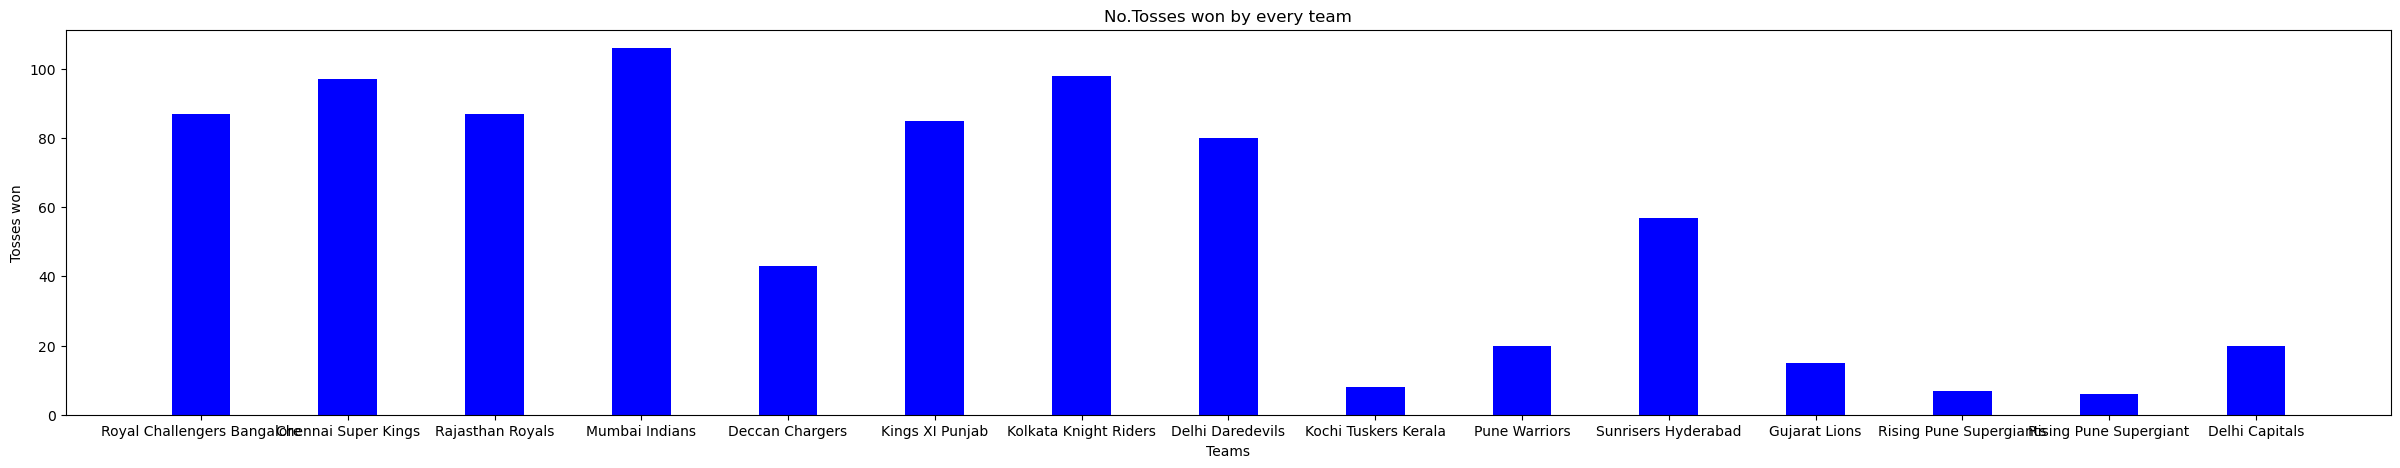

In [117]:
# Visualizing the no. of tosses won by each team.

x = toss_winner.keys()
y = toss_winner.values()

fig = plt.figure(figsize = (30,5))

plt.bar(x,y, color = 'blue', width =0.4)

plt.xlabel('Teams')
plt.ylabel('Tosses won')
plt.title('No.Tosses won by every team')

plt.show()

### 6. What does the team decide after winning the toss ?

In [120]:
# finding the decisions made after a toss.

toss_des = {}

for i in df_m.values:
    if i[9] not in toss_winner:
        toss_des[i[9]] = 0

In [122]:
# Finding which decision was made after winning the toss

for i in toss_des.keys():
    c = 0
    for j in df_m.values:
        if i == j[9]:
            c += 1
    toss_des[i] = c

In [124]:
toss_des

{'field': 496, 'bat': 320}

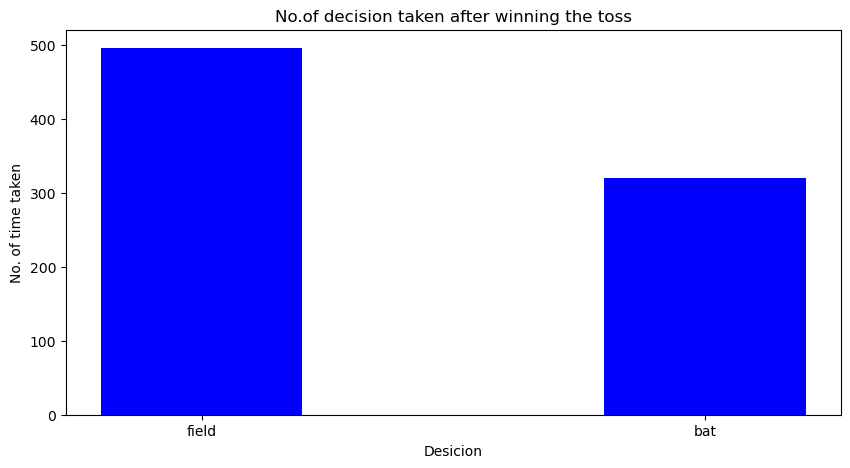

In [126]:
# Visualizing the decision made after the toss was won.

x = toss_des.keys()
y = toss_des.values()

fig = plt.figure(figsize = (10,5))

plt.bar(x,y, color = 'blue', width =0.4)

plt.xlabel('Desicion')
plt.ylabel('No. of time taken')
plt.title('No.of decision taken after winning the toss')

plt.show()

### 7. Does winning the toss imply winning the game ?

To understand the relation between winning the toss and winning the match we need to find the correlation between the two variables.

In [150]:
# Converting the string datatype into integer in toss winner and winner column.
df_m1 = pd.read_csv('IPL Matches 2008-2020.csv')

df_m1['toss_winner'] = df_m1['toss_winner'].astype('category').cat.codes
df_m1['winner']      = df_m1['winner'].astype('category').cat.codes

In [151]:
# finding the correlation between them.

corr_win = df_m1['toss_winner'].corr(df_m1['winner'])
print(round(corr_win,2))

0.47


Thus, we see a moderate positive correlation between winning the toss and winning the match.

### 8. How many times has the chasing team won the match ?

To find how many times the chasing team has won the match we need to find the total matches which has df_m['result'] as wickets.

In [144]:
chase_win = 0

for i in df_m['result']:
    if i == 'wickets':
        chase_win += 1
        
print(chase_win)

print('That is', round(chase_win/len(df_m)*100, 2), '% of the total',len(df_m), 'matches')

435
That is 53.31 % of the total 816 matches


### 9. Which team has played the most number of matches?

In [255]:
#finding the no. of teams

most_matches = {}

for j in (6,7):
    for i in df_m.values:
        if i[j] not in most_matches:
            most_matches[i[j]] = 0

In [156]:
#finding the number of matches played by each team

for i in most_matches.keys():
    c = 0
    for j in (6,7):
        for k in df_m.values:
            if i == k[j]:
                c += 1
    most_matches[i] = c

In [188]:
#finding the team which played the most matches.

lst_m = most_matches.items()
df_most_matches = pd.DataFrame(lst_m, columns = ['Team', 'No. of matches played'])
df_most_matches.sort_values(by = 'No. of matches played', ascending = False)

,Team,No. of matches played
3,Mumbai Indians,203
0,Royal Challengers Bangalore,195
4,Kolkata Knight Riders,192
1,Kings XI Punjab,190
7,Chennai Super Kings,178
2,Delhi Daredevils,161
5,Rajasthan Royals,161
10,Sunrisers Hyderabad,124
6,Deccan Chargers,75
9,Pune Warriors,46


Thus, we found out mumbai indians has played the most matches.

### 10. Which team has won the most number of times?

In [189]:
#finding the number of times each team has won.

most_wins = {}

for i in most_matches.keys():
    c=0
    for j in df_m.values:
        if (i) == (j[10]):
            c +=1
    
    most_wins[(i)] = c

In [190]:
#Finding which team has won the most.

lst_mw = most_wins.items()
df_most_wins = pd.DataFrame(lst_mw, columns = ['Team', 'No. of times won'])
df_most_wins.sort_values(by = 'No. of times won', ascending = False)

,Team,No. of times won
3,Mumbai Indians,120
7,Chennai Super Kings,106
4,Kolkata Knight Riders,99
0,Royal Challengers Bangalore,91
1,Kings XI Punjab,88
5,Rajasthan Royals,81
2,Delhi Daredevils,67
10,Sunrisers Hyderabad,66
6,Deccan Chargers,29
14,Delhi Capitals,19


Mumbai Indians have won the most matches that is 120 matches

### 11. Which team has the highest winning percentage?

In [191]:
#To find the highest winning percentage we simply divide the teams no.of wins to no. of matches played.

win_perc = {}

for i in most_wins.keys():
    win_perc[i]= round(most_wins[i]/most_matches[i]*100,2)

In [192]:
#finding the team with the highest percentage.

lst_wp = win_perc.items()
df_win_perc = pd.DataFrame(lst_wp, columns = ['Team', 'Win Percentage'])
df_win_perc.sort_values(by = 'Win Percentage', ascending = False)

,Team,Win Percentage
13,Rising Pune Supergiant,62.50
7,Chennai Super Kings,59.55
3,Mumbai Indians,59.11
14,Delhi Capitals,57.58
10,Sunrisers Hyderabad,53.23
4,Kolkata Knight Riders,51.56
5,Rajasthan Royals,50.31
0,Royal Challengers Bangalore,46.67
1,Kings XI Punjab,46.32
11,Gujarat Lions,43.33


Thus, we can see that rising pune super giants has the highest win percentage.

### 12. Which is the biggest win in terms of run_margin

In [194]:
df_m.sort_values(by = 'result_margin', ascending = False).head(1)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
620,1082635,Delhi,2017-05-06,LMP Simmons,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146.0,N,NaN,Nitin Menon,CK Nandan


The above match is the biggest win in terms of run_margin

### 13. Which batsmen has played the most number of balls? 

In [197]:
# finding all the batsmen.

batsmen = {}

for i in df_b.values:
    if i[4] not in batsmen:
        batsmen[i[4]]=0

In [201]:
# finding the number of balls played by each batsmen.

for i in batsmen:
    c = 0
    for j in df_b.values:
        if i == j[4]:
            c+=1
    
    batsmen[i] = c

In [206]:
#Finding the batsmen who has played the most balls.

lst_b = batsmen.items()
df_mpb = pd.DataFrame(lst_b, columns = ['Batsmen', 'No. of balls played'])
df_mpb.sort_values(by = 'No. of balls played', ascending = False).head(5)

,Batsmen,No. of balls played
15,V Kohli,4609
31,S Dhawan,4208
61,RG Sharma,4088
19,SK Raina,4041
186,DA Warner,3819


Thus, we see that V Kohli has played the most number of balls in IPL.

### 14. Who are the leading run scorer of all time?

In [205]:
#finding the total number of runs scored by every batsmen.

bats_run = {}

for i in batsmen.keys():
    c = 0
    for j in df_b.values:
        if i == j[4]:
            c += j[9]
    
    bats_run[i] = c

In [207]:
#Finding the batsmen who has scored the most.

lst_br = bats_run.items()
df_br = pd.DataFrame(lst_br, columns = ['Batsmen', 'No. of runs'])
df_br.sort_values(by = 'No. of runs', ascending = False).head(5)

,Batsmen,No. of runs
15,V Kohli,6081
19,SK Raina,5604
186,DA Warner,5522
31,S Dhawan,5452
61,RG Sharma,5394


Thus, we found that V Kohli has scored the most runs.

### 15. Which batsmen has scored the most 4's?

In [210]:
#finding the no. of fours scored by every batsmen.

bats_four = {}

for i in batsmen.keys():
    c = 0
    for j in df_b.values:
        if (i == j[4] and j[7] == 4):
            c += 1
    
    bats_four[i] = c

In [211]:
#Finding the batsmen who has scored the most fours.

lst_bf = bats_four.items()
df_bf = pd.DataFrame(lst_bf, columns = ['Batsmen', 'No. of fours'])
df_bf.sort_values(by = 'No. of fours', ascending = False).head(5)

,Batsmen,No. of fours
31,S Dhawan,591
186,DA Warner,510
15,V Kohli,504
19,SK Raina,493
32,G Gambhir,492


S Dhawan has scored the most number of fours.

### 16. Which batsmen has scored the most 6's.

In [212]:
#finding the no. of sixes scored by every batsmen.

bats_six = {}

for i in batsmen.keys():
    c = 0
    for j in df_b.values:
        if (i == j[4] and j[7] == 6):
            c += 1
    
    bats_six[i] = c

In [213]:
#Finding the batsmen who has scored the most sixes.

lst_bs = bats_six.items()
df_bs = pd.DataFrame(lst_bs, columns = ['Batsmen', 'No. of sixes'])
df_bs.sort_values(by = 'No. of sixes', ascending = False).head(5)

,Batsmen,No. of sixes
163,CH Gayle,349
107,AB de Villiers,235
24,MS Dhoni,216
61,RG Sharma,214
15,V Kohli,202


CH Gayle has scored the most number of sixes.

### 17. Who is the leading wicket taker

In [215]:
# finding all the bowlers 

bowler = {}

for i in df_b.values:
    if i[6] not in bowler:
        bowler[i[6]] = 0

In [218]:
# finding the no. of wickets taken by every bowler.

for i in bowler.keys():
    c=0
    for j in df_b.values:
        if (i == j[6] and j[11]==1):
            c += 1
    
    bowler[i] = c

In [219]:
# finding the most wicket taking bowler.

lst_bo = bowler.items()
df_bo  = pd.DataFrame(lst_bo, columns = ['Bowler', 'No. of wickets'])
df_bo.sort_values(by = 'No. of wickets', ascending = False).head(5)

,Bowler,No. of wickets
100,SL Malinga,188
56,DJ Bravo,175
87,A Mishra,169
15,PP Chawla,164
40,Harbhajan Singh,161


SL Malinga is the most wicket taking bowler

### 18. Which stadium has hosted the most number of matches?

In [224]:
# Finding all the stadiums.

stadiums = {}

for i in df_m.values:
    if i[4] not in stadiums:
        stadiums[i[4]] = 0

In [227]:
#finding the no. of matches played in every stadium.

for i in stadiums.keys():
    c = 0
    for j in df_m.values:
        if i == j[4]:
            c += 1
    
    stadiums[i] = c

In [229]:
lst_st = stadiums.items()
df_st = pd.DataFrame(lst_st, columns = ['Stadium', 'No. of matches played'])
df_st.sort_values(by = 'No. of matches played', ascending = False).head()

,Stadium,No. of matches played
4,Eden Gardens,77
2,Feroz Shah Kotla,74
3,Wankhede Stadium,73
0,M Chinnaswamy Stadium,65
6,"Rajiv Gandhi International Stadium, Uppal",64


Eden gardens has hosted the most number of IPL matches.

### 19. What is the count of 4's hit in every season?

In [233]:
# finding the number of 4's scored in all matches.

m_s = {}

for i in matches.keys():
    c = 0
    for j in df_b.values:
        if (i == j[0] and j[7] == 4):
            c += 1
    m_s[i] = c 

In [250]:
# finding the number of 4's scored in every season.

season_4 = {}

for i in seasons.keys():
    seas = 0
    for j in df_m.values:
        for k in m_s.keys():
            if (i in j[2] and j[0] == k):
                seas += m_s[k]
    
    season_4[i] = seas

In [251]:
season_4

{'2008': 1703,
 '2009': 1317,
 '2010': 1708,
 '2011': 1916,
 '2012': 1911,
 '2013': 2052,
 '2014': 1562,
 '2015': 1607,
 '2016': 1633,
 '2017': 1611,
 '2018': 1652,
 '2019': 1653,
 '2020': 1583}

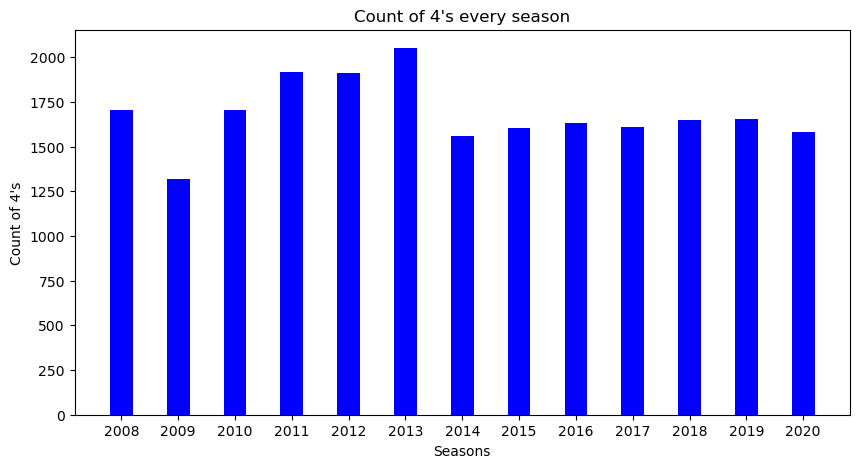

In [252]:
#Visualizing the count of 4's in every season.

x = season_4.keys()
y = season_4.values()

fig = plt.figure(figsize = (10,5))

plt.bar(x,y, color = 'blue', width =0.4)

plt.xlabel('Seasons')
plt.ylabel("Count of 4's")
plt.title("Count of 4's every season")

plt.show()

### 20. What is the count of 6's in every season.

In [245]:
# finding the number of 6's scored in all matches.

m_ss = {}

for i in matches.keys():
    c = 0
    for j in df_b.values:
        if (i == j[0] and j[7] == 6):
            c += 1
    m_ss[i] = c 

In [247]:
# finding the number of 6's scored in every season.

season_6 = {}

for i in seasons.keys():
    seas = 0
    for j in df_m.values:
        for k in m_ss.keys():
            if (i in j[2] and j[0] == k):
                seas += m_ss[k]
    
    season_6[i] = seas

In [248]:
season_6

{'2008': 623,
 '2009': 506,
 '2010': 585,
 '2011': 639,
 '2012': 733,
 '2013': 675,
 '2014': 714,
 '2015': 692,
 '2016': 639,
 '2017': 705,
 '2018': 872,
 '2019': 784,
 '2020': 735}

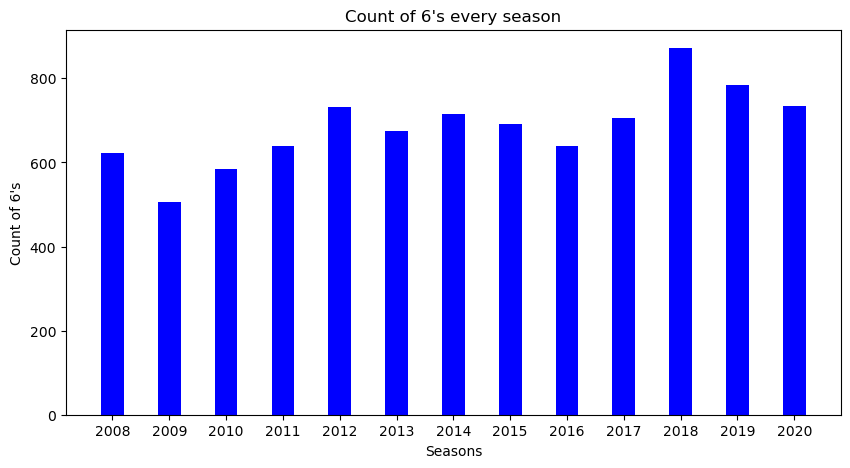

In [253]:
#Visualizing the count of 6's in every season.

x = season_6.keys()
y = season_6.values()

fig = plt.figure(figsize = (10,5))

plt.bar(x,y, color = 'blue', width =0.4)

plt.xlabel('Seasons')
plt.ylabel("Count of 6's")
plt.title("Count of 6's every season")

plt.show()

Therefore, we saw some of the frequently asked questions such as runs scored, number of fours/sixes, best players, best teams and much more being answered by analysing the data of the last 12 to 13 years of IPL data. 
This concludes my project. Thank you.